In [216]:
import numpy as np
import pandas as pd
#import seaborn as sn
#sn.set(style="blue", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [217]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

Icon?             genome-scores.csv links.csv         ratings.csv
README.txt        genome-tags.csv   movies.csv        tags.csv


In [218]:
!cat ./movielens/movies.csv | wc -l

   27279


In [219]:
!head -5 ./movielens/movies.csv

In [220]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
#movies.head()

<class 'pandas.core.frame.DataFrame'>


In [221]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [222]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
#ratings.head()

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [223]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [224]:
#is any row NULL ?

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [225]:
#is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

We have some tags which are NULL.

In [226]:
tags = tags.dropna()

In [227]:
#Check again: is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [228]:
#merge movies df with tags df on the movieID attribute
movie_tags = movies.merge(tags, on='movieId', how='inner')
#movie_tags.head()

In [229]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
#avg_ratings.head()

In [230]:
box_office = movie_tags.merge(avg_ratings, on='movieId', how='inner')
del box_office['userId']
#box_office.head()

# Average of ratings for book adaptations

In [231]:
#create filter to match only movies that have been adapted from books
adapted_from_book = box_office['tag'].str.contains('adapted from:book')
#apply filter to box_office df and save
bo_book_adaptation = box_office[adapted_from_book]
#multiple rows with same movieId so group by movie Id
bo_book_adaptation = bo_book_adaptation.groupby('movieId', as_index=False).mean()
#print the first 5
bo_book_adaptation.head()

,movieId,timestamp,rating
0,2,1.264837e+09,3.211977
1,8,1.183425e+09,3.142049
2,17,1.309903e+09,3.968573
3,25,1.294958e+09,3.689510
4,28,1.265960e+09,4.057546


Find mean of all rows in bo_book_adaptation df

In [232]:
bo_ba_mean = bo_book_adaptation['rating'].mean()
bo_ba_mean

3.4680040478423924

# Average of ratings for comic adaptations

In [233]:
#create filter to match only movies that have been adapted from comics
adapted_from_comic = box_office['tag'].str.contains('adapted from:comic')
#apply filter to box_office df and save
bo_comic_adaptation = box_office[adapted_from_comic]
#multiple rows with same movieId so group by movie Id
bo_comic_adaptation = bo_comic_adaptation.groupby('movieId', as_index=False).mean()
#print the first 5
bo_comic_adaptation.head()

,movieId,timestamp,rating
0,153,1.224049e+09,2.894727
1,158,1.177807e+09,2.932000
2,353,1.269938e+09,3.513586
3,374,1.211477e+09,2.424773
4,592,1.234365e+09,3.402365


Find mean of all rows in bo_comic_adaption df

In [234]:
bo_ca_mean = bo_comic_adaptation['rating'].mean()
bo_ca_mean

3.1023421482542806

# Average of ratings for game adaptations

In [235]:
#create filter to match only movies that have been adapted from games
adapted_from_game = box_office['tag'].str.contains('adapted from:game')
#apply filter to box_office df and save
bo_game_adaptation = box_office[adapted_from_game]
#multiple rows with same movieId so group by movie Id
bo_game_adaptation = bo_game_adaptation.groupby('movieId', as_index=False).mean()
#print the first 5
bo_game_adaptation.head()

,movieId,timestamp,rating
0,44,1.260609e+09,2.653875
1,393,1.182126e+09,1.867222
2,546,1.184213e+09,2.080393
3,1391,1.284664e+09,2.963175
4,1681,1.210045e+09,2.023233


Find mean of all rows in bo_game_adaption df

In [236]:
bo_ga_mean = bo_game_adaptation['rating'].mean()
bo_ga_mean

2.5223669330707703

# Data Visualization

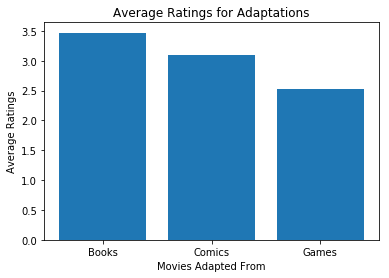

In [237]:
#define x-axis labels
label = ('Books', 'Comics', 'Games')
index = np.arange(len(label))
avg_ratings = [bo_ba_mean, bo_ca_mean, bo_ga_mean]
plt.bar(index, avg_ratings)
plt.xlabel('Movies Adapted From', fontsize=10)
plt.ylabel('Average Ratings', fontsize=10)
plt.xticks(index, label, fontsize=10)
plt.title('Average Ratings for Adaptations')
plt.show()